In [ ]:
import tensorflow as tf
import keras 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehmetaliuyar","key":"913b4c71939d781ffd8a225ce3a37637"}'}

In [ ]:
!pip install kaggle -q      # At first, I suspect the kaggle API lose effect so it doesn't have .kaggle folder. (not working)
!rm -rf /root/.kaggle.      # when I created the folder, it says the file or dir already exits
!mkdir /root/.kaggle        # successful
!mv kaggle.json /root/.kaggle/kaggle.json    # not sure if I have to use full destination path, I previously only used /root/.kaggle and it failed. Don't have time to validate this thought.
!ls /root/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12
!kaggle -v

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 27.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=aef86269ac09827433e2f1efb1412bad884b66f86a2683e7a0f31652d63c996f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
Kaggle API 1.5.12


In [ ]:
!kaggle datasets download -d elibooklover/victorian400
# !kaggle datasets download -d hsankesara/flickr-image-dataset

 98% 472M/484M [00:04<00:00, 147MB/s]
100% 484M/484M [00:04<00:00, 108MB/s]


In [ ]:

!unzip victorian400.zip
!rm victorian400.zip
# !unzip flickr-image-dataset.zip
# !rm flickr-image-dataset.zip

Archive:  victorian400.zip
  inflating: README.txt              
  inflating: gray/Victorian1.png     
  inflating: gray/Victorian10.png    
  inflating: gray/Victorian100.png   
  inflating: gray/Victorian101.png   
  inflating: gray/Victorian102.png   
  inflating: gray/Victorian103.png   
  inflating: gray/Victorian104.png   
  inflating: gray/Victorian105.png   
  inflating: gray/Victorian106.png   
  inflating: gray/Victorian107.png   
  inflating: gray/Victorian108.png   
  inflating: gray/Victorian109.png   
  inflating: gray/Victorian11.png    
  inflating: gray/Victorian110.png   
  inflating: gray/Victorian111.png   
  inflating: gray/Victorian112.png   
  inflating: gray/Victorian113.png   
  inflating: gray/Victorian114.png   
  inflating: gray/Victorian115.png   
  inflating: gray/Victorian116.png   
  inflating: gray/Victorian117.png   
  inflating: gray/Victorian118.png   
  inflating: gray/Victorian119.png   
  inflating: gray/Victorian12.png    
  inflating: gray/Victo

In [ ]:
def sorted_alphanumeric(data):
    # ^sıralıyor başka ne yapıyor ??????????
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
SIZE = 256
color_img = []
path = '/content/resized'
files = os.listdir(path)
print(files)
files = sorted_alphanumeric(files)
print(files)
for i in tqdm(files):    
        if i == 'Victorian400.png':
            break
        else:    
            img = cv2.imread(path + '/'+i,1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (SIZE, SIZE))
            # 255 e bölme sebbi normalizasyon ???
            img = img.astype('float32') / 255.0  
            color_img.append(img_to_array(img))


gray_img = []
path = '/content/gray'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
         if i == 'Victorian400.png':
            break
         else: 
            img = cv2.imread(path + '/'+i,1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (SIZE, SIZE))
            img = img.astype('float32') / 255.0
            gray_img.append(img_to_array(img))


['Victorian13.png', 'Victorian312.png', 'Victorian46.png', 'Victorian240.png', 'Victorian275.png', 'Victorian94.png', 'Victorian167.png', 'Victorian204.png', 'Victorian245.png', 'Victorian101.png', 'Victorian35.png', 'Victorian147.png', 'Victorian368.png', 'Victorian40.png', 'Victorian291.png', 'Victorian377.png', 'Victorian333.png', 'Victorian219.png', 'Victorian270.png', 'Victorian371.png', 'Victorian67.png', 'Victorian6.png', 'Victorian160.png', 'Victorian116.png', 'Victorian262.png', 'Victorian86.png', 'Victorian97.png', 'Victorian80.png', 'Victorian322.png', 'Victorian295.png', 'Victorian274.png', 'Victorian125.png', 'Victorian156.png', 'Victorian301.png', 'Victorian180.png', 'Victorian150.png', 'Victorian323.png', 'Victorian78.png', 'Victorian142.png', 'Victorian272.png', 'Victorian10.png', 'Victorian139.png', 'Victorian45.png', 'Victorian77.png', 'Victorian317.png', 'Victorian15.png', 'Victorian81.png', 'Victorian271.png', 'Victorian400.png', 'Victorian233.png', 'Victorian87.png

100%|█████████▉| 399/400 [00:01<00:00, 314.33it/s]


In [ ]:
color_dataset=tf.data.Dataset.from_tensor_slices(np.array(color_img[:350])).batch(8)
gray_dataset=tf.data.Dataset.from_tensor_slices(np.array(gray_img[:350])).batch(8)


color_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(color_img[350:])).batch(8)
gray_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(gray_img[350:])).batch(8)

EĞİTİM İÇİN RENKLİ RESİM SAYISI  352
EĞİTİM İÇİN GRİ RESİM SAYISI  352


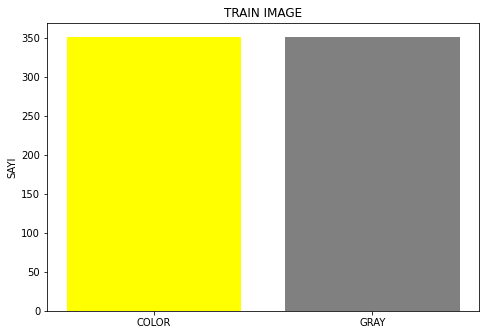

TEST İÇİN RENKLİ RESİM SAYISI  56
TEST İÇİN GRİ RESİM SAYISI  56


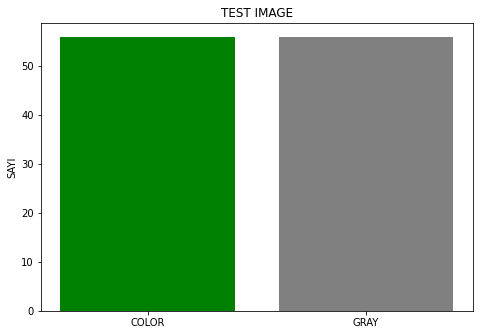

In [ ]:
print("EĞİTİM İÇİN RENKLİ RESİM SAYISI ",8*len(color_dataset))
print("EĞİTİM İÇİN GRİ RESİM SAYISI ",8*len(gray_dataset))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('TRAIN IMAGE')
ax.set_ylabel("SAYI")
deger = ['COLOR', 'GRAY']
sayı = [8*len(color_dataset),8*len(gray_dataset)]
ax.bar(deger,sayı,color=['yellow', 'gray'])
plt.show()

print("TEST İÇİN RENKLİ RESİM SAYISI ",8*len(color_dataset_t))
print("TEST İÇİN GRİ RESİM SAYISI ",8*len(gray_dataset_t))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('TEST IMAGE')
ax.set_ylabel("SAYI")
deger = ['COLOR', 'GRAY']
sayı = [8*len(color_dataset_t),8*len(gray_dataset_t)]
ax.bar(deger,sayı,color=['green', 'gray'])
plt.show()


In [ ]:
example_color = next(iter(color_dataset))
example_gray = next(iter(gray_dataset))


In [ ]:
def plot_images(a = 4):
    
    for i in range(a):
        plt.figure(figsize = (10,10))
        plt.subplot(121)
        plt.title('color')
        plt.imshow(example_color[i] )

        plt.subplot(122)
        plt.title('gray')
        plt.imshow(example_gray[i])
        plt.show()

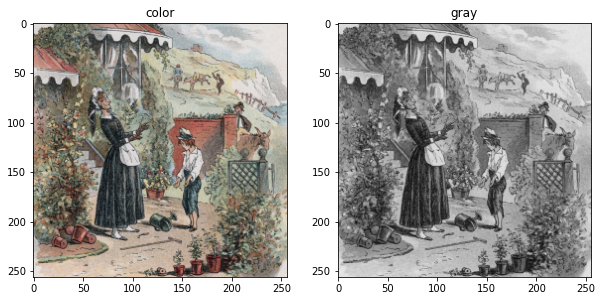

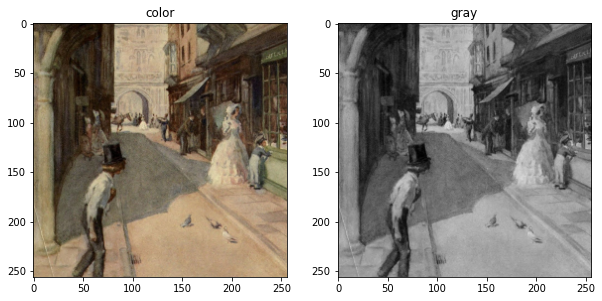

In [ ]:
plot_images(2)

In [ ]:
#  FARKLI ÖZELLİK TESPİT EDERİZ VE HER SEFERİNDE TÜM RESMİ TARAR ÇIKTIYA DEĞİL ana RESME
from keras.engine.training import Model
from keras import layers
skips=[]
# convolısyon ne yapar:resmin özelliklerni algılamak
# padding =same aynı boyutta kal
# kernel_initializer='he_normal' bu işlemde başlangıç ağırlıklaını belirliyor peki neden he_normal kullandık ????
# glorot_uniform,he_uniform denedik fotoğraflarda puslanma oldu 

input=(keras.layers.Input(shape=[256,256,3]))
x=keras.layers.Conv2D(64,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(input)

# aktivasyon fonksiyommuz relu ve leaky relu denedik leakyreluda daha iyi sonuç adlık ,sebidede - değerleri tam 0 yapmaması ,yani türev alınınca negatif tarafta da eğitim gerçekleşir.
x=(layers.LeakyReLU())(x) 
skips.append(x)
# (256+2*0-4)/2+1+1de bias


x=keras.layers.Conv2D(128,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
# ağın daha kararlı ve düzenli hale gelmesini sağlar.
# Eş zamanlı olarak öğrenime olanak sağlar. Eğitimimizin hızlanmasını sağlar.
# Batch normalization sayesinde ağdaki katmanlar, önceki katmanın öğrenmesini beklemek zorunda kalmaz. 
x=(layers.BatchNormalization())(x) 
x=(layers.LeakyReLU())(x)
skips.append(x)
# SIRAYLA DIZININ ICINE KATMANLARI EKLIYOR


x=keras.layers.Conv2D(256,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)


x=keras.layers.Conv2D(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)

x=keras.layers.Conv2D(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)

x=keras.layers.Conv2D(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)


x=keras.layers.Conv2D(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)

x=keras.layers.Conv2D(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)
skips.append(x)
skips = reversed(skips[:-1])


# up
#BİRİ BİRİ BÜYÜLTÜYOR BÜYÜLTÜREKEN ÖZELLİK ÖĞRENİYOR....

up=[]

x=keras.layers.Conv2DTranspose(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.Dropout(0.5))(x)
x=(layers.ReLU())(x)
up.append(x)


x=keras.layers.Conv2DTranspose(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.Dropout(0.5))(x)
x=(layers.ReLU())(x)
up.append(x)


x=keras.layers.Conv2DTranspose(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.Dropout(0.5))(x)
x=(layers.ReLU())(x)
up.append(x)

x=keras.layers.Conv2DTranspose(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.ReLU())(x)
up.append(x)

x=keras.layers.Conv2DTranspose(512,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.ReLU())(x)
up.append(x)



x=keras.layers.Conv2DTranspose(256,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.ReLU())(x)
up.append(x)


x=keras.layers.Conv2DTranspose(128,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.ReLU())(x)
up.append(x)

x=keras.layers.Conv2DTranspose(64,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.ReLU())(x)
up.append(x)

#BİRLEŞTİRME YAPIYO BİRİ KÜÇÜLTÜP ,BİRİ BÜYÜLTTÜĞÜ İÇİN İKSİNİN AYNI ANDA ÇALIŞMASI GEREKİR BİRLŞETİRME YAPIYOR 
for u, skip in zip(up, skips):
    x = tf.keras.layers.Concatenate()([u, skip])


initializer = tf.random_normal_initializer(0., 0.02) #RASTGELE GENEL DEĞER
last=keras.layers.Conv2DTranspose(3,kernel_size=4,strides=2,padding='same',kernel_initializer=initializer,activation='tanh')(x)
generator=Model(inputs=input,outputs=last)
generator.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  3136        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 128, 128, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
input=(keras.layers.Input(shape=[256,256,3]))
initializer = tf.random_normal_initializer(0., 0.02)
target=(keras.layers.Input(shape=[256,256,3]))
x = tf.keras.layers.concatenate([input, target])

x=keras.layers.Conv2D(64,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.LeakyReLU())(x)


x=keras.layers.Conv2D(128,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)

x=keras.layers.Conv2D(256,kernel_size=4,strides=2,padding='same',kernel_initializer='he_normal',)(x)
x=(layers.BatchNormalization())(x)
x=(layers.LeakyReLU())(x)

zero_pad1 = tf.keras.layers.ZeroPadding2D()(x)
conv = tf.keras.layers.Conv2D(512, 4, strides=1,kernel_initializer=initializer,)(zero_pad1)
batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)
zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) 

last = tf.keras.layers.Conv2D(1, 4, strides=1,kernel_initializer=initializer)(zero_pad2) 
discriminator=Model(inputs=[input, target], outputs=last)
discriminator.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_7 (Concatenate)    (None, 256, 256, 6)  0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
lossgenT=[]
lossreal=[]
lossfake=[]
lossdisT=[]
LAMBDA = 100

def generator_loss(disc_generated_output, gen_output, target):
  # disc fakeye fake der ise generator loss artar 
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

 
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)
  lossgenT.append(total_gen_loss)
  return total_gen_loss, gan_loss, l1_loss

def discriminator_loss(disc_real_output, disc_generated_output):
  
  # gerçek olanlar  için output 1 
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
  # sahte olanlar için 0 olmalı
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
  # ikisinin toplamıda disc hatası verir.
  total_disc_loss = real_loss + generated_loss 

  lossreal.append(real_loss)
  lossfake.append(generated_loss)
  lossdisT.append(total_disc_loss)
  return total_disc_loss

In [ ]:

def train_step(input_image, target, epoch):
  # işlemleri takip edebilmek ve türevlerini alabilmek için Gradienttape kullandık
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)


  # real i disc geçir
    disc_real_output = discriminator([input_image, target], training=True)
  # fake i disc geçir
    disc_generated_output = discriminator([input_image, gen_output], training=True)

  # LOSS LARI HESAPLAMIŞ
    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
    
  # gen ve disc için eğitilebilen değişkenler için türev hesaplama işlemi.
  generator_gradients = gen_tape.gradient(gen_total_loss,generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,discriminator.trainable_variables)
  # ÜSTTEKİLERE GÖRE AŞAĞI TARAFI GUNCELLIYOR
  #türevleri değişkenlere uygulama
  generator_optimizer.apply_gradients(zip(generator_gradients,generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables))

 

In [ ]:
import time
def fit(train_ds, epochs,):
  for epoch in range(epochs):
    start = time.time()

    print("Epoch: ", epoch+1)

    # Train
    for n, (input_image, target) in train_ds.enumerate():
      
      train_step(input_image, target, epoch)
    print()

  

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


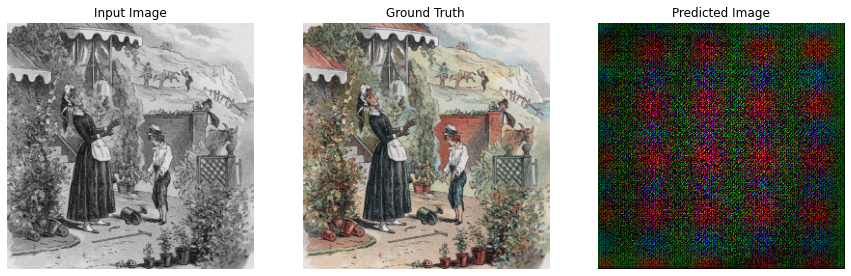

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


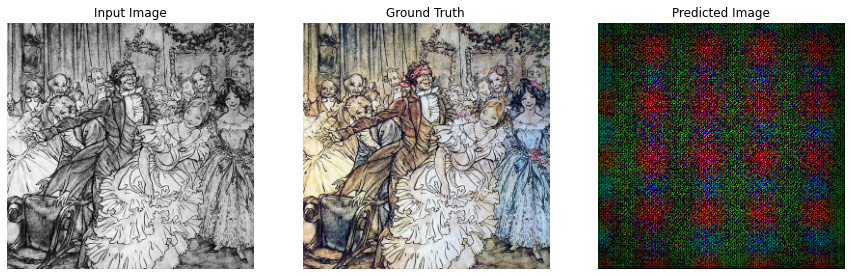

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


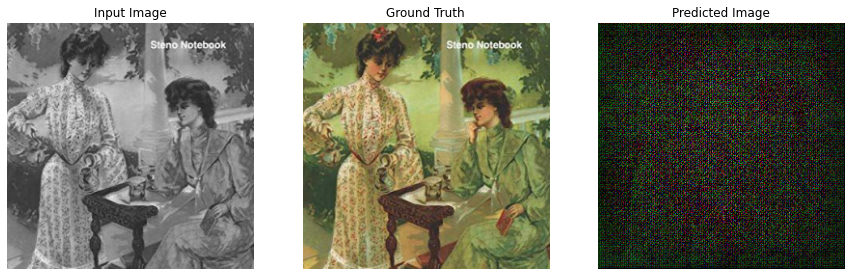

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


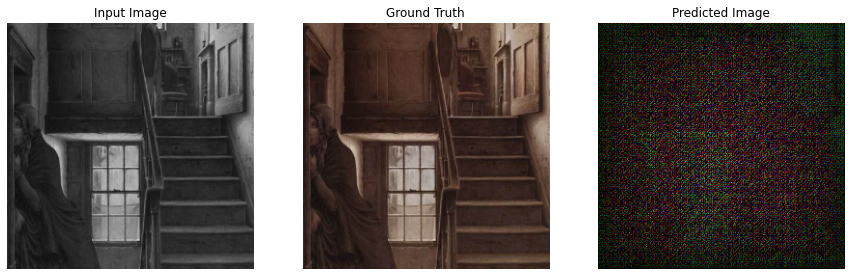

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


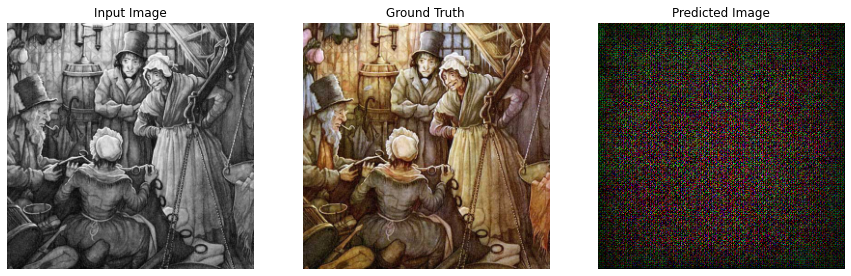

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

for example_input, example_target in tf.data.Dataset.zip((gray_dataset,color_dataset)).take(5):
  generate_images(generator, example_input, example_target)
# EĞİTİM ÖNCESİ RASTGELE AĞIRLIKLARLA DENEME


In [ ]:
model=fit(tf.data.Dataset.zip((gray_dataset, color_dataset)),epochs =200)

Epoch:  1

Time taken for epoch 1 is 26.23187255859375 sec

Epoch:  2

Time taken for epoch 2 is 20.68709683418274 sec

Epoch:  3

Time taken for epoch 3 is 20.888204097747803 sec

Epoch:  4

Time taken for epoch 4 is 21.224438905715942 sec

Epoch:  5

Time taken for epoch 5 is 21.399246215820312 sec

Epoch:  6

Time taken for epoch 6 is 41.23041486740112 sec

Epoch:  7

Time taken for epoch 7 is 22.393549919128418 sec

Epoch:  8

Time taken for epoch 8 is 21.717079162597656 sec

Epoch:  9

Time taken for epoch 9 is 21.87679100036621 sec

Epoch:  10

Time taken for epoch 10 is 22.015493154525757 sec

Epoch:  11

Time taken for epoch 11 is 22.22976064682007 sec

Epoch:  12

Time taken for epoch 12 is 22.30924916267395 sec

Epoch:  13

Time taken for epoch 13 is 22.33566164970398 sec

Epoch:  14

Time taken for epoch 14 is 22.385735273361206 sec

Epoch:  15

Time taken for epoch 15 is 22.417217016220093 sec

Epoch:  16

Time taken for epoch 16 is 22.41243577003479 sec

Epoch:  17

Time t

8800


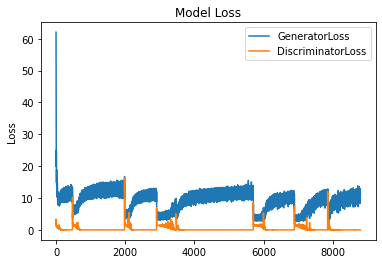

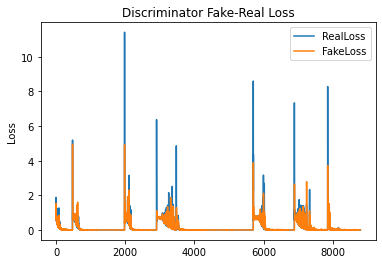

In [ ]:
lossgenT=np.array(lossgenT)
lossdisT=np.array(lossdisT)
lossreal=np.array(lossreal)
lossfake=np.array(lossfake)
print(len(lossdisT))
plt.plot(lossgenT)
plt.plot(lossdisT)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.legend(['GeneratorLoss', 'DiscriminatorLoss'], loc='upper right')
plt.show()

plt.plot(lossreal)
plt.plot(lossfake)
plt.title('Discriminator Fake-Real Loss')
plt.ylabel('Loss')
plt.legend(['RealLoss', 'FakeLoss'], loc='upper right')
plt.show()


# her epokta 44 resim için ayrı ayrı loss alıyor.

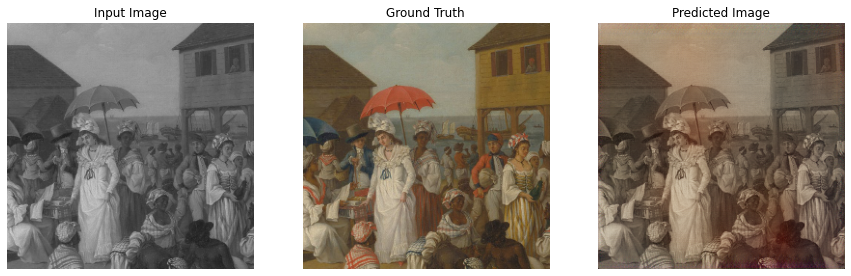

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


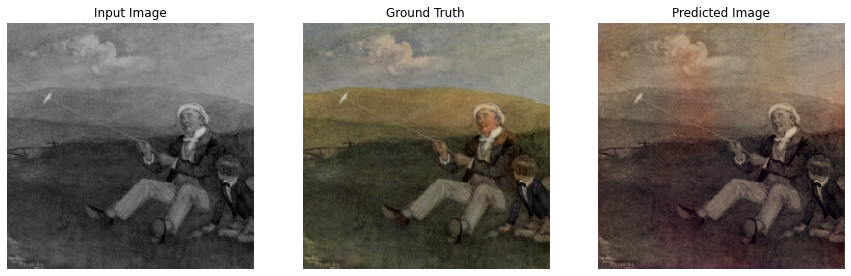

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show() 
  

for example_input, example_target in tf.data.Dataset.zip((gray_dataset_t,color_dataset_t)).take(2):
  generate_images(generator, example_input, example_target)
